In [2]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from scipy.stats import kstest,ttest_ind
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
plot_file = "../data/oligogenic/oligo_table.csv"
plot_df = pd.read_csv(plot_file)

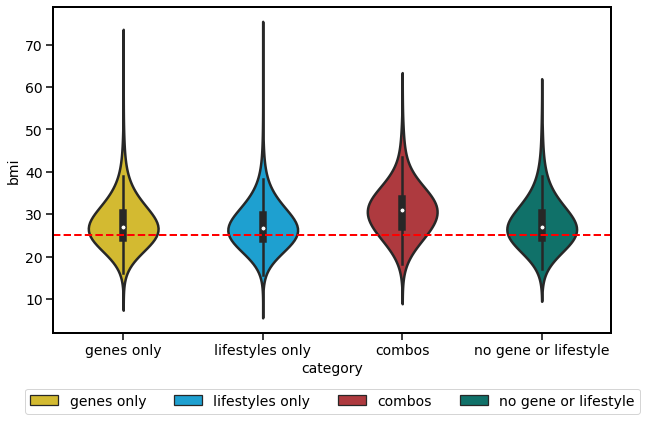

In [4]:
fig,ax = plt.subplots(figsize=(10, 6))
sns_ax = sns.violinplot(
    data=plot_df, y="bmi", x="category", 
    hue="category", hue_order=["genes only", "lifestyles only", "combos", "no gene or lifestyle"],
    palette=["#eecc16", "#00ADEE", "#c1272d", "#008176"],
    scale="area",
    linewidth=2.5,
    width=0.5,
    dodge=False,
    bw=0.75,
    cut=2,
    ax=ax
    )
# sns.stripplot(data=plot_df, y="bmi", x="category", color="k", ax=ax, s=2, alpha=0.1)
ax.axhline(y=25, linewidth=2, color='r', linestyle='--')
# legend below as multiple columns
h,l = sns_ax.axes.get_legend_handles_labels()
sns_ax.axes.legend_.remove()
sns_ax.legend(h,l, loc="upper center", ncol=4, bbox_to_anchor=(0.5, -0.15))


In [7]:
go = plot_df.loc[plot_df.category=="genes only", "bmi"]
lo = plot_df.loc[plot_df.category=="lifestyles only", "bmi"]
co = plot_df.loc[plot_df.category=="combos", "bmi"]
nogl = plot_df.loc[plot_df.category=="no gene or lifestyle", "bmi"]

In [8]:
ttest_ind(go, co, alternative="less"), kstest(go, co)

(Ttest_indResult(statistic=-20.54940854802602, pvalue=3.2990364506078124e-92),
 KstestResult(statistic=0.30871026204674384, pvalue=2.4424906541753444e-15))

In [9]:
ttest_ind(lo, co, alternative="less"), kstest(lo, co)

(Ttest_indResult(statistic=-26.464873311293942, pvalue=6.336703066774004e-153),
 KstestResult(statistic=0.3374483338903157, pvalue=2.477150204411713e-131))

In [10]:
ttest_ind(nogl, co, alternative="less"), kstest(nogl, co)

(Ttest_indResult(statistic=-16.20806295628815, pvalue=4.005373574617204e-57),
 KstestResult(statistic=0.311031109212761, pvalue=2.3314683517128287e-15))